Github Repo: 
https://github.com/adam080880/tb2-image-processing/blob/main/tb2.ipynb

Soal no 1
Kerjakan pengolahan citra untuk deteksi lingkaran menggunakan hough transform sesuai objek dibawah ini

<Figure size 640x480 with 0 Axes>

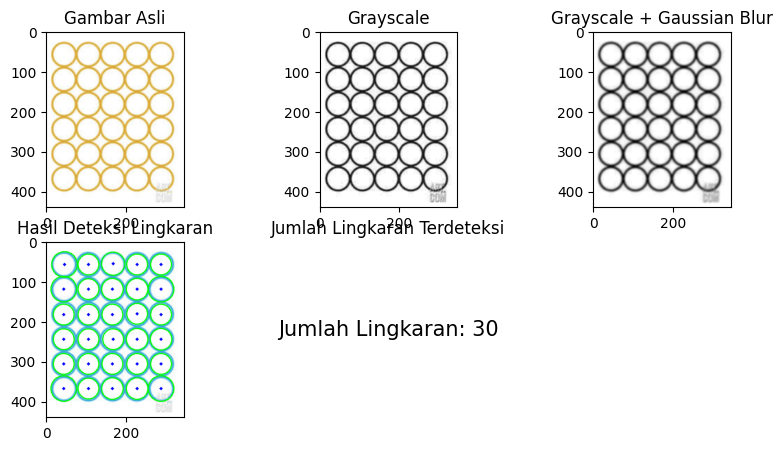

In [18]:
# import dulu packagenya
import cv2
import matplotlib.pyplot as plt
import numpy as np

# baca gambar
img = cv2.imread('lingkaran.png')
output = img.copy()

plt.figure()
fig, ax = plt.subplots(2, 3, figsize=(10, 5))

# konversi ke grayscale

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur untuk mengurangi noise dulu
gray_blurred = cv2.GaussianBlur(gray, (9, 9), 2)

ax[0, 0].set_title('Gambar Asli')
ax[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax[0, 1].set_title('Grayscale')
ax[0, 1].imshow(gray, cmap='gray')

ax[0, 2].set_title('Grayscale + Gaussian Blur')
ax[0, 2].imshow(gray_blurred, cmap='gray')

# Deteksi lingkaran dengan Hough Transform
circles = cv2.HoughCircles(
    gray_blurred, 
    cv2.HOUGH_GRADIENT, 
    dp=1,
    minDist=40,
    param1=100,
    param2=30,
    minRadius=20,
    maxRadius=40
)

jumlah_circles = 0

# Jika ada lingkaran yang terdeteksi
if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        # Gambar lingkaran
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)
        # # Gambar pusat lingkaran
        cv2.circle(output, (x, y), 2, (0, 0, 255), 3)
        jumlah_circles += 1

# Tampilkan hasil
ax[1, 0].set_title('Hasil Deteksi Lingkaran')
ax[1, 0].imshow(output)
ax[1, 1].set_title('Jumlah Lingkaran Terdeteksi')
ax[1, 1].axis('off')
ax[1, 1].text(0.5, 0.5, f'Jumlah Lingkaran: {jumlah_circles}', 
             fontsize=15, ha='center', va='center')
ax[1, 2].remove()
plt.show()



Soal no 2
Kerjakan pengolahan citra gambar dibawah ini menggunakan Convert Grayscale Image to Binary Image dan Object Boundary Search (Boundary tracing) serta dapat dihitung jumlahnya.

Jumlah objek terdeteksi: 29


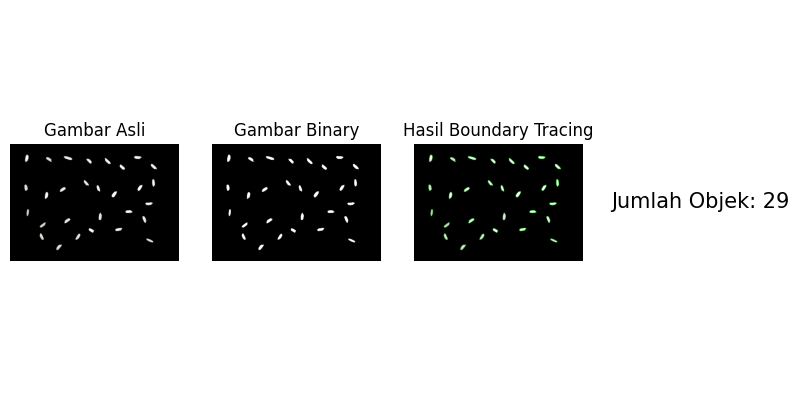

In [8]:
import cv2;
import matplotlib.pyplot as plt

# 1. Baca gambar dan ubah ke grayscale
img = cv2.imread('no2.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Konversi ke binary image (thresholding)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 3. Boundary tracing (menggunakan contour detection OpenCV)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 4. Gambar batas objek
output = img.copy()
cv2.drawContours(output, contours, -1, (0, 255, 0), 1)

# 5. Hitung dan tampilkan jumlah objek
jumlah_objek = len(contours)
print(f"Jumlah objek terdeteksi: {jumlah_objek}")

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.title('Gambar Asli')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 4, 2)
plt.title('Gambar Binary')
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.title('Hasil Boundary Tracing')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 4, 4)
plt.axis('off')
plt.text(0.5, 0.5, f'Jumlah Objek: {jumlah_objek}', 
         fontsize=15, ha='center', va='center')
plt.axis('off')
plt.show()

Soal no 3
Kerjakan pengolahan citra gambar dibawah ini menggunakan Operator Sobel, dengan sobel_x array ([-1,1,1],[-2,1,2],[-1,1,1]) dan sobel_y array ([-1,2,1],[0,1,0],[1,2,1])

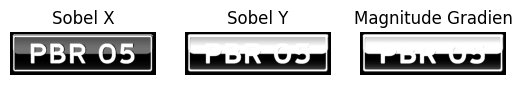

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dan ubah ke grayscale
img = cv2.imread('no3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Definisikan kernel Sobel
sobel_x = np.array([
    [-1, 1, 1],
    [-2, 1, 2],
    [-1, 1, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, 2, 1],
    [ 0, 1, 0],
    [ 1, 2, 1]
], dtype=np.float32)

# Konvolusi (filtering) dengan kernel
grad_x = cv2.filter2D(gray, -1, sobel_x)
grad_y = cv2.filter2D(gray, -1, sobel_y)

# Hitung magnitude gradien (gabungan sobel x dan y)
magnitude = cv2.magnitude(grad_x.astype(np.float32), grad_y.astype(np.float32))
magnitude = cv2.convertScaleAbs(magnitude)  # ubah ke uint8 agar bisa ditampilkan

# Tampilkan hasil
plt.subplot(1, 3, 1)
plt.title('Sobel X')
plt.imshow(grad_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Sobel Y')
plt.imshow(grad_y, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Magnitude Gradien')
plt.imshow(magnitude, cmap='gray')
plt.axis('off')
plt.show()


Soal no 4
Kerjakan pengolahan citra gambar dibawah ini menggunakan Object Boundary Search (Boundary tracing) serta dapat dihitung jumlahnya

Jumlah objek terdeteksi: 4


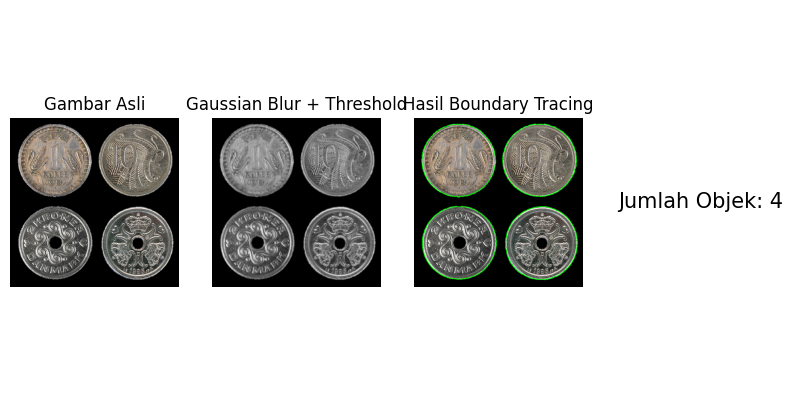

In [23]:
import cv2
import matplotlib.pyplot as plt

# Baca gambar
# 1. Baca gambar dan ubah ke grayscale
img = cv2.imread('no4.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Blur untuk ilangin noise
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold biner (ubah ke hitam-putih)
_, binary = cv2.threshold(gray_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Temukan kontur (boundary tracing)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# 4. Gambar batas objek
output = img.copy()
cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

# 5. Hitung dan tampilkan jumlah objek
jumlah_objek = len(contours)
print(f"Jumlah objek terdeteksi: {jumlah_objek}")

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.title('Gambar Asli')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Gaussian Blur + Threshold')
plt.imshow(cv2.cvtColor(gray_blurred, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Hasil Boundary Tracing')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 4)
plt.text(0.5, 0.5, f'Jumlah Objek: {jumlah_objek}', 
         fontsize=15, ha='center', va='center')
plt.axis('off')
plt.show()

Soal no 5
Kerjakan pengolahan citra menggunakan RGB color space dengan memisahkan masing-masing warna R, G dan B

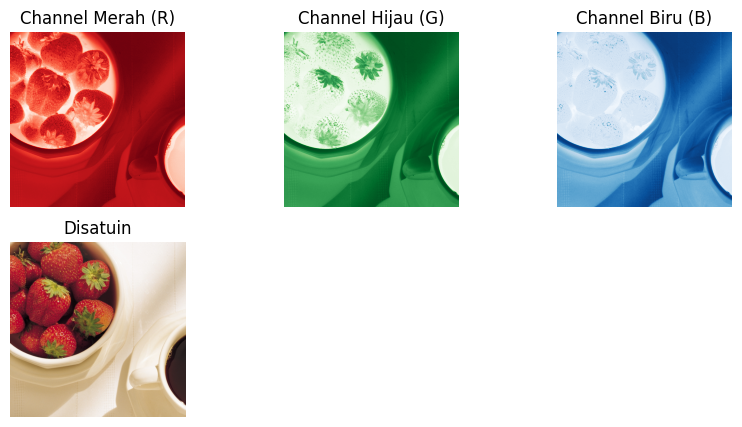

In [31]:
# Kerjakan pengolahan citra menggunakan RGB color space dengan memisahkan masing-masing warna R, G dan B
import cv2
import matplotlib.pyplot as plt
# Baca gambar
img = cv2.imread('no5.jpeg')
# Pisahkan channel R, G, B
b, g, r = cv2.split(img)
# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.title('Channel Merah (R)')
plt.imshow(r, cmap='Reds')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.title('Channel Hijau (G)')
plt.imshow(g, cmap='Greens')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.title('Channel Biru (B)')
plt.imshow(b, cmap='Blues')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.title('Disatuin')
img_rgb = cv2.merge((b, g, r))
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()